Get Awesome Decision Tree visualiazation using pydotplus library. 

Ref:
https://lukesingham.com/whos-going-to-leave-next/

In [ ]:

import pandas as pd

from sklearn import tree
from pydotplus import graph_from_dot_data
#import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
fileName='data/HR-Employee-Attrition-UseCase.xlsx'
data = pd.read_excel(io=fileName)

In [4]:
le=LabelEncoder()

In [5]:
data.dropna(inplace=True)

In [6]:
y=le.fit_transform(data['Attrition'])

In [7]:
dtr = tree.DecisionTreeRegressor(max_depth=3)

In [8]:
X=pd.get_dummies(data.drop('Attrition', axis=1), drop_first=True)

In [9]:
X.shape

(1459, 46)

In [10]:
dtr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
dot_data = tree.export_graphviz(dtr, out_file=None,  
                     feature_names=X.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)  

In [12]:
graph = graph_from_dot_data(dot_data)  

In [13]:
%matplotlib inline

In [14]:
graph.write_png('decision_tree.png')

True

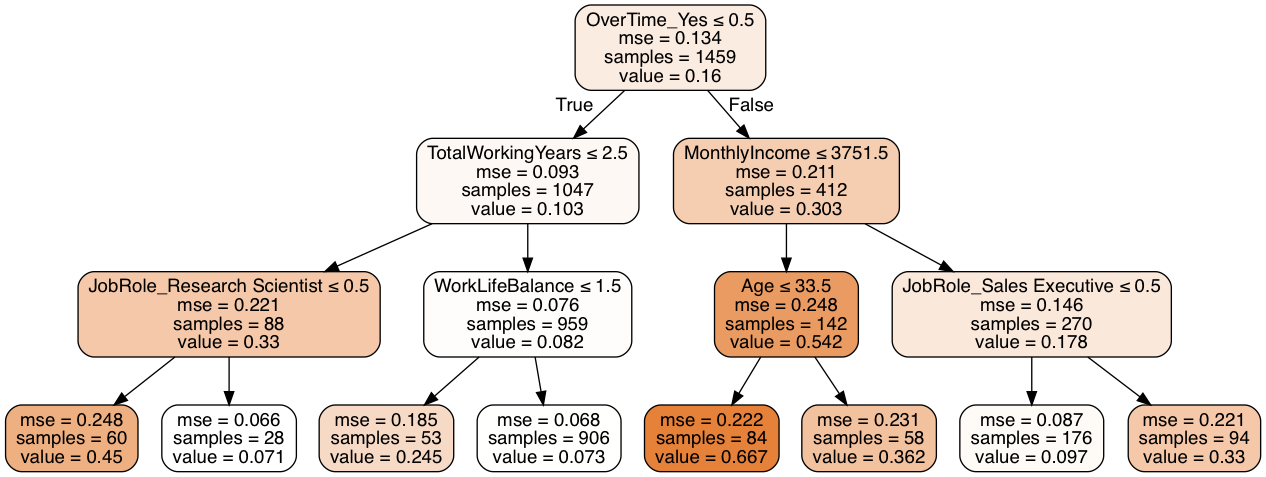

In [15]:
Image('decision_tree.png')